In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.stats as st
import seaborn as sns
%matplotlib inline

In [2]:
DATA_FILE = "../input/jpx-tokyo-stock-exchange-prediction/example_test_files/stock_prices.csv"
assert os.path.isfile(DATA_FILE)
stonks = pd.read_csv(DATA_FILE)
stonks.corr()

,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag
SecuritiesCode,1.000000,0.026583,0.026715,0.026933,0.027088,0.075221,0.019163,NaN,-0.026922
Open,0.026583,1.000000,0.999913,0.999832,0.999740,-0.020745,-0.002517,NaN,0.000612
High,0.026715,0.999913,1.000000,0.999834,0.999892,-0.020426,-0.002334,NaN,0.000365
Low,0.026933,0.999832,0.999834,1.000000,0.999885,-0.021408,-0.001234,NaN,0.000963
Close,0.027088,0.999740,0.999892,0.999885,1.000000,-0.020672,-0.001213,NaN,0.000584
Volume,0.075221,-0.020745,-0.020426,-0.021408,-0.020672,1.000000,0.003647,NaN,0.003590
AdjustmentFactor,0.019163,-0.002517,-0.002334,-0.001234,-0.001213,0.003647,1.000000,NaN,0.000867
ExpectedDividend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SupervisionFlag,-0.026922,0.000612,0.000365,0.000963,0.000584,0.003590,0.000867,NaN,1.000000


In [3]:
stonks["lag1"] = stonks["Close"].shift(1)
stonks["lag2"] = stonks["Close"].shift(2)
stonks["return"] = stonks["lag2"] - stonks["lag1"]
print(stonks)

              RowId        Date  SecuritiesCode    Open    High     Low  \
0     20211206_1301  2021-12-06            1301  2982.0  2982.0  2965.0   
1     20211206_1332  2021-12-06            1332   592.0   599.0   588.0   
2     20211206_1333  2021-12-06            1333  2368.0  2388.0  2360.0   
3     20211206_1375  2021-12-06            1375  1230.0  1239.0  1224.0   
4     20211206_1376  2021-12-06            1376  1339.0  1372.0  1339.0   
...             ...         ...             ...     ...     ...     ...   
3995  20211207_9990  2021-12-07            9990   526.0   535.0   524.0   
3996  20211207_9991  2021-12-07            9991   795.0   806.0   792.0   
3997  20211207_9993  2021-12-07            9993  1640.0  1640.0  1620.0   
3998  20211207_9994  2021-12-07            9994  2437.0  2440.0  2423.0   
3999  20211207_9997  2021-12-07            9997   711.0   719.0   706.0   

       Close   Volume  AdjustmentFactor  ExpectedDividend  SupervisionFlag  \
0     2971.0     8900

/Users/isalgado/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/isalgado/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/isalgado/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:781: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/Users/isalgado/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),


Best fit with vonmises, MLE value: -215899.91665092955


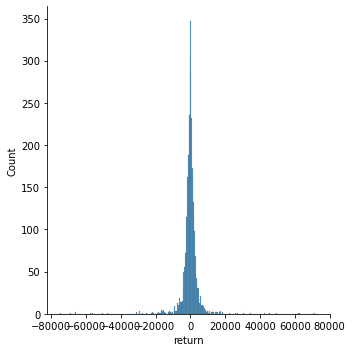

In [4]:
import numpy as np
distributions = [st.laplace, st.norm, st.chi2, st.t, st.beta, st.lognorm, st.gamma, st.f, st.expon, st.invgamma, st.vonmises, st.powerlaw, st.betaprime, st.alpha]
mles = []

for distribution in distributions:
    pars = distribution.fit(stonks["return"].dropna())
    mle = distribution.nnlf(pars, stonks["return"].dropna())
    mles.append(mle)

results = [(distribution.name, mle) for distribution, mle in zip(distributions, mles)]
best_fit = sorted(zip(distributions, mles), key=lambda d: d[1])[0]
print("Best fit with {}, MLE value: {}".format(best_fit[0].name, best_fit[1]))

sns.displot(stonks, x="return")